# CSM148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
data = pd.read_csv("heartdisease.csv")

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


[Use this area to describe any fields you believe will be problemmatic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

Some of the categorical variables have been converted to integer types, but by doing so, we may have implied an ordering that isn't necessarily true. For example, thal has 3 possible values: normal, fixed defect, and reversible defect. These are mapped to 0, 1, and 2, respectively. This implies a numerical relationship between normal, fixed defect, and reversible defect, but this isn't necessarily true.

Additionally, it may be helpful to group some of the numerical variables like age, such as teens, young adults, middle-age, elderly, etc.

### Determine if we're dealing with any null values. If so, report on which columns? 

[Discuss here] No, we're not dealing with any null values because there are 303 non-null values for every column, and we have 303 entries total.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["sick"] = le.fit_transform(data["sick"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_disease = data.copy(deep=True)
heart_disease.drop(["sick"], axis=1, inplace=True)

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

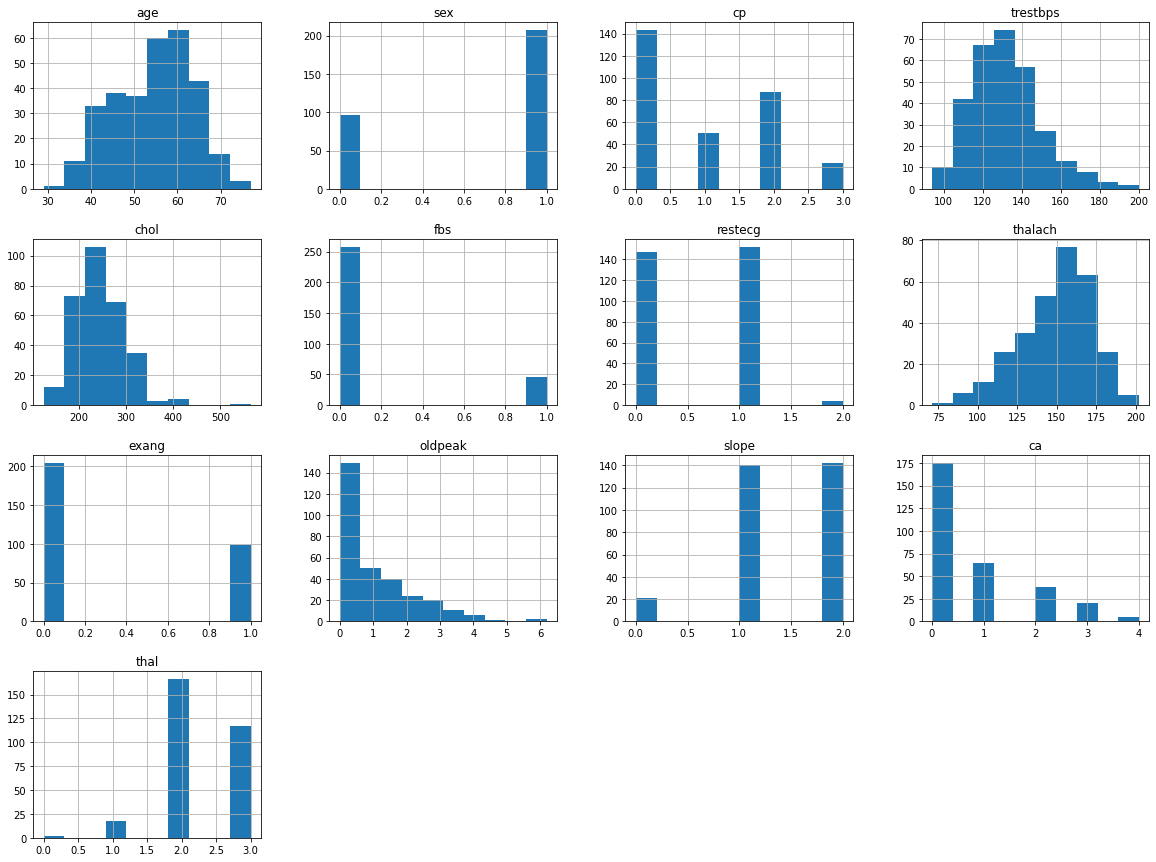

In [10]:
heart_disease.hist(bins=10, figsize=(20,15))
# age follows a gradient
# sex is binary
# cp has limited selections
# trestbps follows a gradient
# chol follows a gradient
# fbs is binary
# restecg has limited selection
# thalach follows a gradient
# exang is binary
# oldpeak follows a gradient
# slope has limited selections
# ca has limited selections
# thal has limited selections

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

number of sick individuals: 138
number of healthy individuals: 165


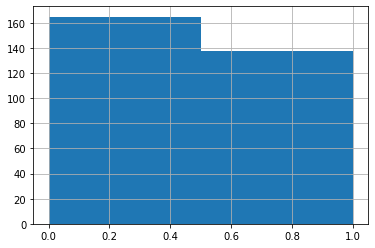

In [11]:
# Histogram of Healthy (0) vs. Sick (1)
data["sick"].hist(bins=2)

num_sick = 0
for i in data["sick"]:
    if i == 1:
        num_sick += 1
print("number of sick individuals:", num_sick)
print("number of healthy individuals:", data["sick"].size - num_sick)

[Include description of findings here] We found 138 individuals were sick, and 165 were healthy. This seems sufficiently balanced.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss prompt here] Artificially balancing a dataset could create issues because if we don't have enough data to downsample, the model could end up overfitting. Another solution is to introduce synthetic data samples of the minority class; however, synthetic data samples aren't always representative of real data.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

age         0.225439
sex         0.280937
cp         -0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
thalach    -0.421741
exang       0.436757
oldpeak     0.430696
slope      -0.345877
ca          0.391724
thal        0.344029
sick        1.000000
Name: sick, dtype: float64

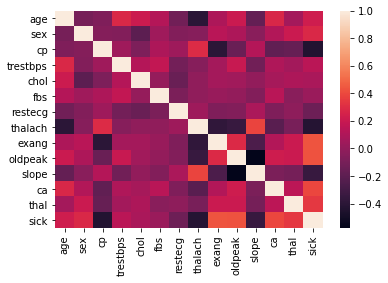

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
corr_matrix["sick"]

[Discuss correlations here] As expected, the correlation between sick and itself is 1. exang and sick are positively correlated because those with exercise-induced angina (1) are more likely to be sick (1).

Some variables correlate more highly than others because they are tied to heart disease, or there could also be confounding variables.

## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [86]:
y = data["sick"]
# We already have the "sick" column dropped from the heart_disease dataframe

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [88]:
# k-Nearest Neighbors algorithm
neigh = KNeighborsClassifier() # default uses Euclidean distance and k = 5
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
predictions.shape

(61,)

In [89]:
# Report on model Accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))
print("%-12s %f" % ('R2:', r2))

MSE:         0.278689
RMSE:        0.527910
R2:          -0.122294


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
heart_disease_num = heart_disease.drop(categorical_features, axis=1)
numerical_features = list(heart_disease_num)

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
heart_disease_num_tr = num_pipeline.fit_transform(heart_disease_num)

full_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features), ("cat", OneHotEncoder(categories="auto"), categorical_features),])

heart_disease_prepared = full_pipeline.fit_transform(heart_disease)

In [91]:
heart_disease_prepared

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [92]:
# k-Nearest Neighbors algorithm

# split the data again
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(heart_disease_prepared, y, test_size=0.2)
print(new_X_train.shape, new_y_train.shape)
print(new_X_test.shape, new_y_test.shape)

# run the same KNN with k neighbors (see above for definition of k)
neigh.fit(new_X_train, new_y_train)
predictions = neigh.predict(new_X_test)
predictions.shape

(242, 30) (242,)
(61, 30) (61,)


(61,)

In [93]:
# Accuracy
mse = mean_squared_error(new_y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(new_y_test, predictions)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))
print("%-12s %f" % ('R2:', r2))

MSE:         0.131148
RMSE:        0.362143
R2:          0.441648


[Discuss Results here] As we can see here, despite keeping everything the same (i.e.default settings for KNN algorithm), the model using the pipelined data performed much better than the model that used the raw data. MSE for raw data was about 0.36 while MSE for pipelined data was only about 0.21. Since we want to minimize the mean squared error, the model using the pipelined data performed much better.

### Parameter Optimization.  As we saw in lecture, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [94]:
k_list = [1, 2, 3, 5, 7, 9, 10, 20, 50]
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k) # default uses Euclidean distance and k = 5
    neigh.fit(new_X_train, new_y_train)
    predictions = neigh.predict(new_X_test)
    mse = mean_squared_error(new_y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(new_y_test, predictions)
    print("For k =", k)
    print("%-12s %f" % ('MSE:', mse))
    print("%-12s %f" % ('RMSE:', rmse))
    print("%-12s %f\n" % ('R2:', r2))

For k = 1
MSE:         0.213115
RMSE:        0.461644
R2:          0.092677

For k = 2
MSE:         0.196721
RMSE:        0.443533
R2:          0.162471

For k = 3
MSE:         0.131148
RMSE:        0.362143
R2:          0.441648

For k = 5
MSE:         0.131148
RMSE:        0.362143
R2:          0.441648

For k = 7
MSE:         0.147541
RMSE:        0.384111
R2:          0.371854

For k = 9
MSE:         0.147541
RMSE:        0.384111
R2:          0.371854

For k = 10
MSE:         0.163934
RMSE:        0.404888
R2:          0.302059

For k = 20
MSE:         0.163934
RMSE:        0.404888
R2:          0.302059

For k = 50
MSE:         0.196721
RMSE:        0.443533
R2:          0.162471



## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

In [102]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)

### This time report four metrics: Accuracy, Precision, Recall, and F1 Score, and plot a Confusion Matrix. 

Accuracy:    0.819672
Precision:   0.730769
Recall:      0.826087
F1 Score:    0.775510

Confusion Matrix:


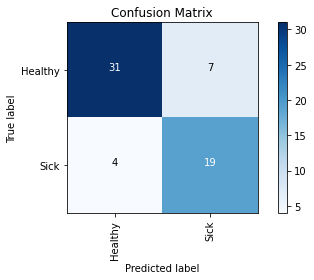

In [103]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 
* Accuracy is the total number of correct predictions over total number of predictions. This is used when true positives and true negatives are more important, but this is often a bad measure for imbalanced classes. For example, if we have a population with a 60:1 proportion between classes and we want to classify, then the model could guess the majority class every time and STILL have a very high accuracy. Its recall, however, will be very low.
* Precision is the number of correct "Sick" guesses over total number of "Sick" guesses. This is associated with the Type I error. A good example of when we would want to maximize precision is in the criminal justice, where we would want to avoid a false positive as much as possible.
* Recall is the number of correct "Sick" guesses over total number of true "Sick" instances. This is associated with the Type II error. A good example of when we would want to maximize recall is in medical diagnostic tests, where we would want to avoid a false negative as much as possible.
* F1 is the weighted average of recall and precision and is calculated using the following formula: 2 * (Recall * Precision) / (Recall + Precision). In general, we default to this measure when we want to maximize precision and recall. We often use this instead of accuracy when we have imbalanced classes.

### Graph the resulting ROC curve of the model

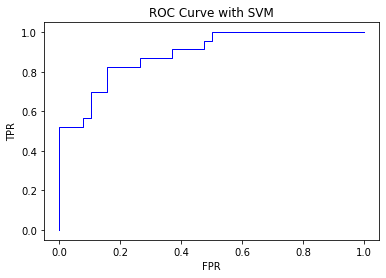

In [104]:
score = log_reg.predict_proba(new_X_test)
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(new_y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color="blue", lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Describe what an ROC curve is and what the results of this graph seem to be indicating

[Discuss] An ROC curve is created by plotting true positive rate (TPR) against false positive rate (FPR) at different threshold settings.
* A higher threshold means that you're admitting fewer positives and defaulting to more negatives. This increases precision, but the recall score will be low because only a few positives will actually be selected.
* A lower threshold means that you're going to make a lot more guesses, so there will be more true positives (good for recall!) but also more false positives (not-so-good for precision).

The above graph seems to be indicating that although the area under the curve (AUC) isn't 1, it's clearly greater than 0.5, which implies that our model is doing a decent job of classifying.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Report out the same metrics. Let's see how your results change!

C:\Users\bonni\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy:    0.819672
Precision:   0.730769
Recall:      0.826087
F1 Score:    0.775510

Confusion Matrix:


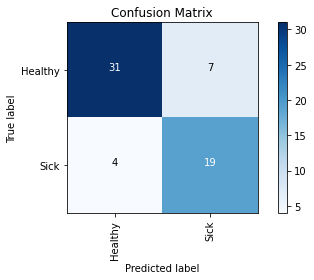

In [113]:
# Logistic Regression
log_reg = LogisticRegression(solver="sag", max_iter=10, penalty="none")
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy:    0.803279
Precision:   0.703704
Recall:      0.826087
F1 Score:    0.760000

Confusion Matrix:


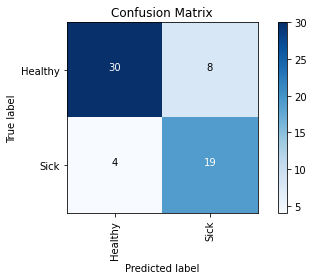

In [116]:
# Logistic Regression
log_reg = LogisticRegression(solver="sag", max_iter=1000, penalty="none")
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

[Provide explanation here] I changed the max_iter parameters to 1000, which is enough iterations for model to converge to a local minimum since SAG is stochastic average gradient.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

Accuracy:    0.819672
Precision:   0.730769
Recall:      0.826087
F1 Score:    0.775510

Confusion Matrix:


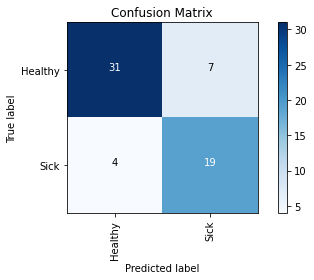

In [117]:
# Logistic Regression
log_reg = LogisticRegression(solver="liblinear", penalty="l1")
log_reg.fit(new_X_train, new_y_train)
predicted = log_reg.predict(new_X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

[Provide explanation here] SAG is stochastic average gradient while liblinear is a library for large linear classification. Liblinear likely produced the optimal outcome because liblinear is a good choice for smaller datasets like ours.

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

[Discuss prompt here]

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [118]:
# SVM
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(new_X_train, new_y_train)
predicted = svm.predict(new_X_test)
score = svm.predict_proba(new_X_test)

### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

Accuracy:    0.803279
Precision:   0.720000
Recall:      0.782609
F1 Score:    0.750000

Confusion Matrix:


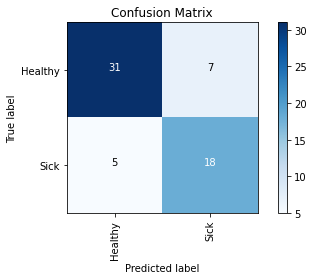

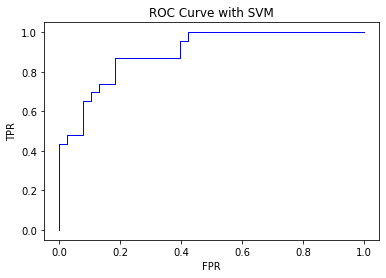

In [119]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(new_y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color="blue", lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [120]:
# SVM

svm = SVC(probability=True, kernel="linear")
svm.fit(new_X_train, new_y_train)
predicted = svm.predict(new_X_test)
score = svm.predict_proba(new_X_test)

Accuracy:    0.819672
Precision:   0.750000
Recall:      0.782609
F1 Score:    0.765957

Confusion Matrix:


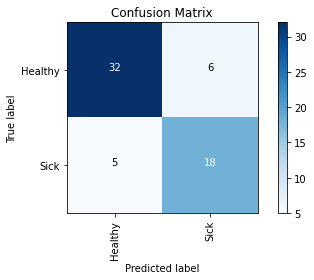

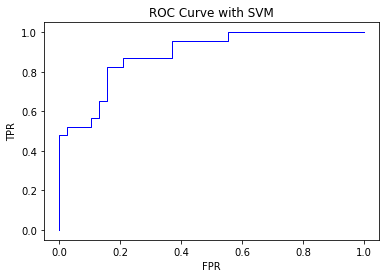

In [121]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(new_y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color="blue", lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Discuss Prompt here]

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] 

## Baysian (Statistical) Classification

In class we will be learning about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result (i.e., both the false positives and false negatives), along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [122]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = gnb.fit(new_X_train, new_y_train).predict(new_X_test)

Number of mislabeled points out of a total 61 points : 13
Accuracy:    0.786885
Precision:   0.692308
Recall:      0.782609
F1 Score:    0.734694

Confusion Matrix:


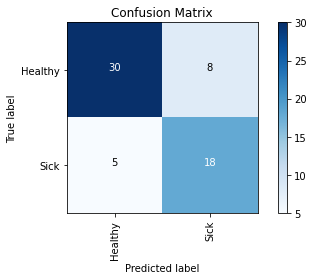

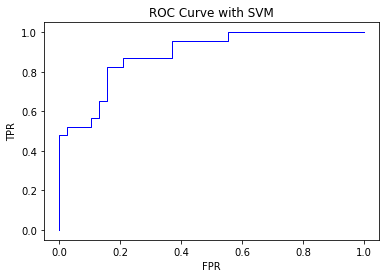

In [124]:
print("Number of mislabeled points out of a total %d points : %d" % (new_X_test.shape[0], (new_y_test != predicted).sum()))

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted)))
print("\nConfusion Matrix:")
draw_confusion_matrix(new_y_test, predicted, ["Healthy", "Sick"])

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(new_y_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color="blue", lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel("FPR")
pyplot.ylabel("TPR")
pyplot.show()

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

[Discuss here] Here, we are making the assumption that the features are independent from one another, but this may be inaccurate because there can be confounding variables and correlation amongst two or more features.

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [127]:
from sklearn.model_selection import KFold
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
model_kfold = LogisticRegression(solver="liblinear", penalty="l1")
results_kfold = model_selection.cross_val_score(model_kfold, heart_disease, data["sick"], cv=kfold)

print("For logistic regression using the liblinear solver and l1 penalty, our mean accuracy across folds is %.2f%%" % (results_kfold.mean()*100.0))

For logistic regression using the liblinear solver and l1 penalty, our mean accuracy across folds is 82.83%


In [128]:
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
model_kfold = SVC(probability=True, kernel="linear")
results_kfold = model_selection.cross_val_score(model_kfold, heart_disease, data["sick"], cv=kfold)

print("For SVM using linear kernel and True probability, our mean accuracy across folds is %.2f%%" % (results_kfold.mean()*100.0))

For SVM using linear kernel and True probability, our mean accuracy across folds is 83.49%


[Discuss] The SVM using linear kernel and True probability was my best-performing model with mean accuracy across folds of 83.49%. Logistic regression using the liblinear solver and l1 penalty came in close second with mean accuracy across folds of 82.83%.